# Data Augmentation


In [2]:
import random
import skimage as sk
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import util
from scipy.misc import imshow
import imageio


from matplotlib.pyplot import imshow
import numpy as np
import cv2


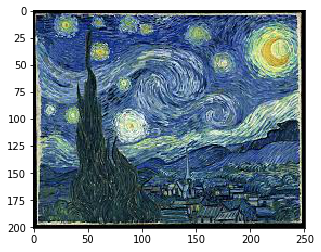

In [3]:
starry = cv2.imread('starry.jpeg')
starry_rgb = cv2.cvtColor(starry, cv2.COLOR_BGR2RGB)
imshow(np.asarray(starry_rgb))


-3.0585604948115765


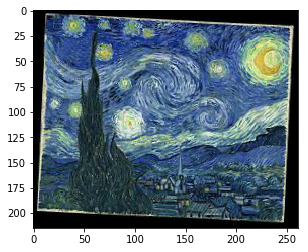

In [4]:
def random_rotation(image):
    # pick a random degree of rotation between 15% on the left and 15% on the right
    rand_degree = random.uniform(-15, 15)
    print(rand_degree)
    return sk.transform.rotate(image, rand_degree, True)

starry_rot = random_rotation(starry_rgb)
imshow(np.asarray(starry_rot))


-3.3032367684721837


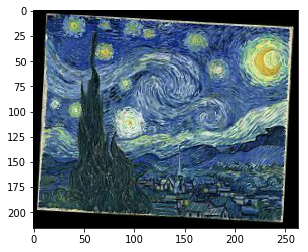

In [5]:
from scipy import ndimage

def random_rotation_ndimage(image):
    # pick a random degree of rotation between 15% on the left and 15% on the right
    rand_degree = random.uniform(-15, 15)
    return ndimage.rotate(image, 45, reshape=False) # reshape = True
   
starry_rot = random_rotation(starry_rgb)
imshow(np.asarray(starry_rot))


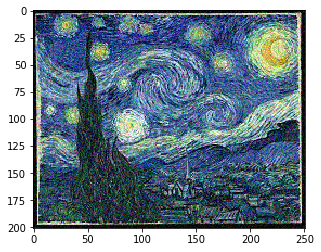

In [6]:
def random_noise(image):
    # add random noise to the image
    return sk.util.random_noise(image)

starry_noisy = random_noise(starry_rgb)
imshow(np.asarray(starry_noisy))


True


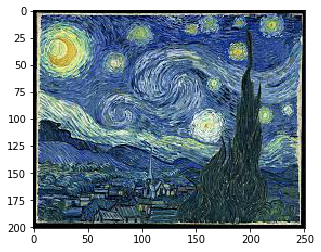

In [7]:
def horizontal_flip(image):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    print(np.all(np.fliplr(image) == image[:, ::-1]))
    # return image[:, ::-1]
    return np.fliplr(image)
    
starry_flipped = horizontal_flip(starry_rgb)
imshow(np.asarray(starry_flipped))


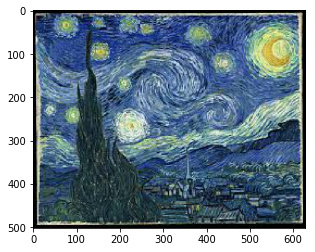

In [8]:
def scale_image(image):
    scaled_image = rescale(image, scale=2.5, mode='constant')
    return scaled_image
    
starry_scaled = scale_image(starry_rgb)
imshow(np.asarray(starry_scaled))


(201, 251, 3)
(100, 125, 3)


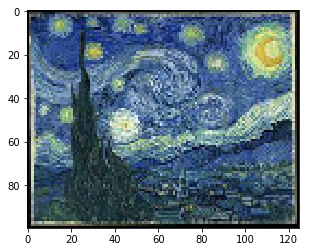

In [9]:
def resize_image(image):
    print(image.shape)
    image_resized = cv2.resize(image, (int( image.shape[1] / 2), int(image.shape[0] / 2)))
    print(image_resized.shape)
    return image_resized
    
starry_resized = resize_image(starry_rgb)
imshow(np.asarray(starry_resized))


360 480


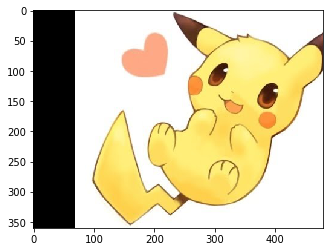

In [10]:

def translate(image):
    num_rows, num_cols = image.shape[:2]
    print(num_rows,num_cols)
    translation_matrix = np.float32([ [1,0,70], [0,1,0] ])
    img_translation = cv2.warpAffine(image, translation_matrix, (num_cols, num_rows))
    return img_translation

pikachu = cv2.imread("pikachu.jpg")
pikachu = cv2.cvtColor(pikachu, cv2.COLOR_BGR2RGB)
pikachu_moves = translate(pikachu)
imshow(np.asarray(pikachu_moves))


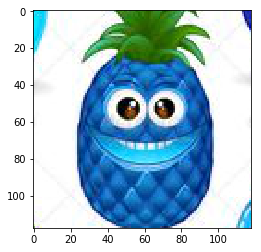

In [29]:
def get_crops(image):
    crops = []
    num_rows, num_cols = image.shape[:2]
    crop_left_up = image[0:(num_rows//2),0:(num_cols//2)]
    crop_right_up = image[num_rows//2:num_rows,0:num_cols//2]
    crop_right_down = image[num_rows//2:num_rows,num_cols//2:num_cols]
    crop_left_down = image[0:num_rows//2,num_cols//2:num_cols]
    crop_center = image[num_rows//2-num_rows//4: num_rows//2+num_rows//4, num_cols//2-num_cols//4: num_cols//2+num_cols//4]
    crops.append(crop_left_up)
    crops.append(crop_right_up)
    crops.append(crop_right_down)
    crops.append(crop_left_down)
    crops.append(crop_center)
    return crops
    
img = cv2.imread("fruits.jpg")
image_crops = []
image_crops = get_crops(img)
imshow(np.array(image_crops[4]))